Generate clusters
---

In [1]:
from sklearn.datasets import make_blobs

# Generate data
X, y = make_blobs(
    n_samples=150, centers=3, n_features=2, cluster_std=0.5, random_state=0)

print('X (features):', X.shape)
print('y (true labels):', y.shape)

X (features): (150, 2)
y (true labels): (150,)


Plotting function
---

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Plot data
def plot(ax, X, y, centroids=None, title=None):
    
    # Plot each cluster
    for cluster in np.unique(y):
        # Find points in this cluster
        idx = (y == cluster)

        # Plot these points
        ax.scatter(X[idx, 0], X[idx, 1], label='cluster {}'.format(cluster))
        
    # Plot centroids
    if centroids is not None:
        for centroid in centroids:
            ax.plot(centroid[0], centroid[1], marker='*', color='black', markersize=16)
        
    # Add legend, labels
    if title is not None:
        ax.set_title(title)
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_aspect('equal', adjustable='box')
    ax.legend(frameon=True, facecolor='white', loc='lower left')
    plt.show()

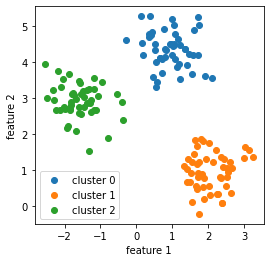

In [3]:
# Plot ground truth
fig = plt.figure()
plot(fig.gca(), X, y)

K-means algorithm (step by step)
---

In [4]:
# Set k
k = 3

In [5]:
# Function to get initial centroids
def init_cluster(X):
    centroids_idx = np.random.choice(len(X), size=k, replace=False)
    centroids = X[centroids_idx]
    return centroids

In [6]:
# Assign points to the closest centroid
def get_clusters(centroids):
    # Distance from each centroid to each point
    distances = []
    for i in range(k):
        # Get centroid
        centroid = centroids[i]
        
        # |point - centroid|^2
        distance = np.sum(np.square(X - centroids[i]), axis=1)
        distances.append(distance)
    distances = np.array(distances).T
    
    # Assign points to closest centroid
    clusters = distances.argmin(axis=1)
    return clusters

In [7]:
# Compute new centroids
def get_centroids(X, clusters):
    new_centroids = []

    for i in range(k):
        # Points in the cluster
        points_idx = (clusters == i)

        # Compute center of the cluster
        center = np.mean(X[points_idx], axis=0)
        new_centroids.append(center)

    return new_centroids

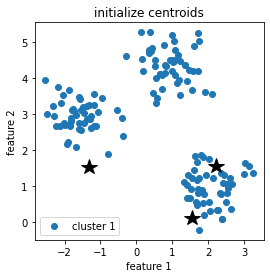

Step: 1


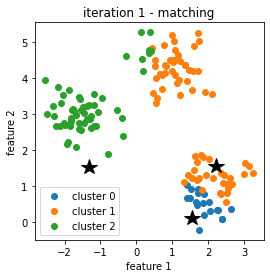

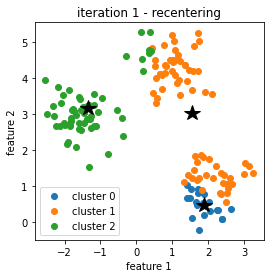

Step: 2


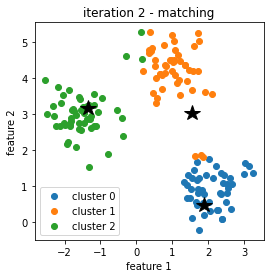

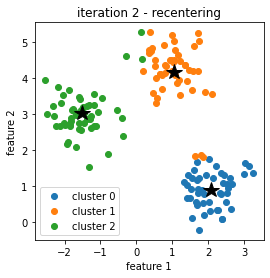

Step: 3


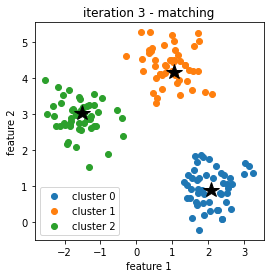

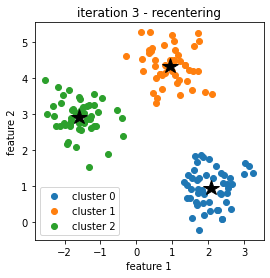

Step: 4


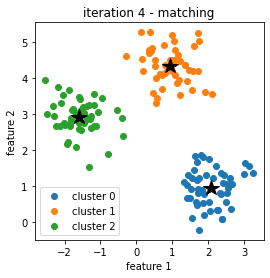

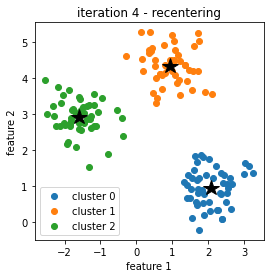

In [8]:
# Set random state
np.random.seed(7)
    
# Generate centroids
centroids = init_cluster(X)
clusters = np.full_like(y, fill_value=1)

# Plot initial centroids
fig = plt.figure()
plot(fig.gca(), X, clusters, centroids, title='initialize centroids')

# k-means step by step
n_steps = 4

for i in range(1, n_steps+1):
    # Print step number
    print('Step:', i)
    
    # Match points to closest centroid
    clusters = get_clusters(centroids)
    fig = plt.figure()
    plot(fig.gca(), X, clusters, centroids, title='iteration {} - matching'.format(i))
    
    # Compute new centroids
    centroids = get_centroids(X, clusters)
    fig = plt.figure()
    plot(fig.gca(), X, clusters, centroids, title='iteration {} - recentering'.format(i))